# Curve fitting
Introduction to Numerical Problem Solving   
CC BY-NC-SA Sakari Lukkarinen, 19.4.2017   
Helsinki University of Applied Sciences

In [1]:
%pylab inline
from scipy.stats import linregress

Populating the interactive namespace from numpy and matplotlib


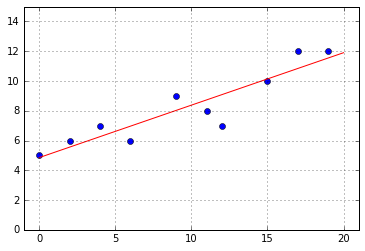

In [12]:
x = array([0, 2, 4, 6, 9, 11, 12, 15, 17, 19])
y = array([5, 6, 7, 6, 9, 8, 7, 10, 12, 12])
plot(x, y, 'o')
xlim((-1, 21))
ylim((0, 15))
grid()

r = linregress(x, y)
a1 = r.slope
a0 = r.intercept
x2 = linspace(0, 20)
y2 = a0 + a1*x2
plot(x2, y2, 'r');

In [10]:
?linregress

In [8]:
results = linregress(x, y)
results

LinregressResult(slope=0.35246995994659536, intercept=4.8515353805073431, rvalue=0.91476728487890446, pvalue=0.00020810234429749022, stderr=0.055033565698469768)

In [9]:
results.slope

0.35246995994659536

## Problem 2
Fit a power function: $y = ax^b$.

Solution:   
Linearize by taking a logarithm on both sides $log(y) = log(a) + b\cdot log(x)$. This can be rewrite: $y_2 = a_2 + b_2\cdot x_2$.

$$a_2 = log(a) \quad b_2 = b$$
$$ a = e^{a_2} \quad b = b_2$$

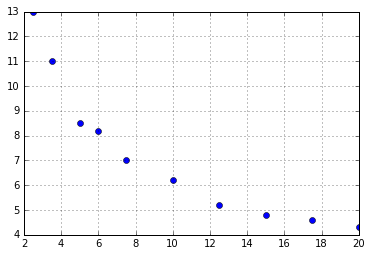

In [26]:
x = array([2.5, 3.5, 5, 6, 7.5, 10, 12.5, 15, 17.5, 20])
y = array([13, 11, 8.5, 8.2, 7, 6.2, 5.2, 4.8, 4.6, 4.3])
plot(x, y, 'o')
grid()

(3.0514429114107231, -0.54028957905870167)

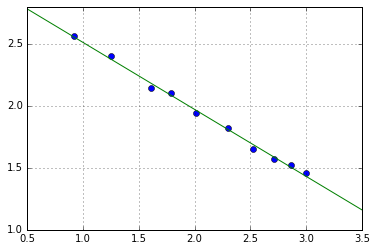

In [30]:
xlog = log(x)
ylog = log(y)
plot(xlog, ylog, 'o')
grid()
r = linregress(xlog, ylog)
b2 = r.slope
a2 = r.intercept
x3 = linspace(0.5, 3.5, 10)
y3 = b2*x3 + a2
plot(x3, y3)
a2, b2

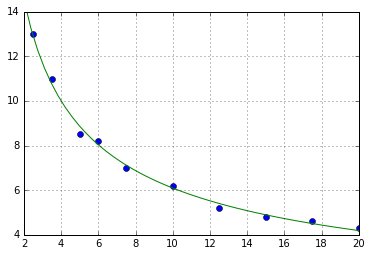

In [28]:
plot(x, y, 'o')
a = exp(a2)
b = b2
x2 = linspace(2, 20)
y2 = a*x2**b
plot(x2, y2)
ylim((4, 14))
grid()

In [31]:
a*9.0**b

6.4514529527015991

In [29]:
a, b

(21.145833985528494, -0.54028957905870167)

In [42]:
# Curve fitting way
from scipy.optimize import curve_fit

def powerfun(x, a, b):
    return a*x**b

p, pcov = curve_fit(powerfun, x, y, p0 = (20, -1.0))
p

array([ 21.47685597,  -0.5484589 ])

In [43]:
x2 = linspace(2, 20, 100)
a = p[0]
b = p[1]
y2 = powerfun(x2, a, b)

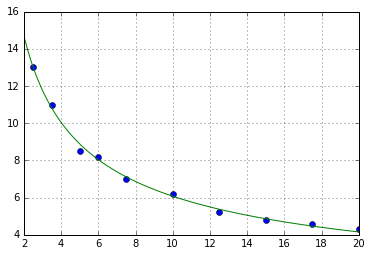

In [44]:
plot(x, y, 'o')
plot(x2, y2)
grid()

## Log-log and semi-log graphs

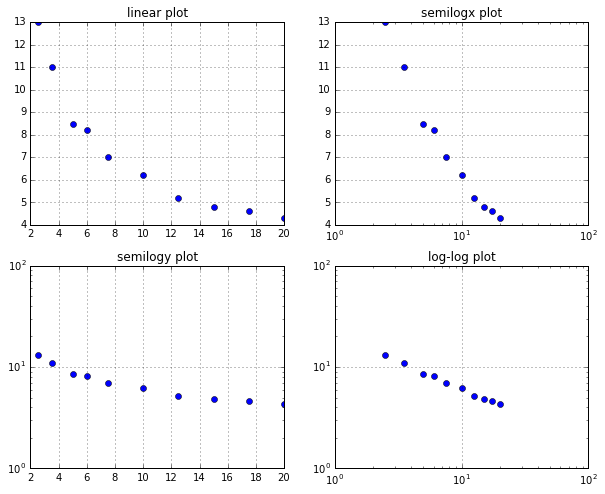

In [55]:
fig, ax = subplots(2, 2, figsize = (10, 8))
sca(ax[0, 0])
plot(x, y, 'o')
title('linear plot')
grid()

sca(ax[0, 1])
semilogx(x, y, 'o')
title('semilogx plot')
grid()

sca(ax[1, 0])
semilogy(x, y, 'o')
title('semilogy plot')
grid()

sca(ax[1, 1])
loglog(x, y, 'o')
title('log-log plot')
grid()

In [ ]:
# Problem 5
def myparabola(x, a, b, c):
    return a*x**2 + b*x + c

p, pcov = curve_fit(myparabola, x, y, p0 = (1, 1, 1))